In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr

In [11]:
sp500 = pd.read_csv(r"sp500.csv", parse_dates=['Date'], index_col=['Date'])
aapl = pd.read_csv(r"aapl.csv", parse_dates=['Date'], index_col=['Date'])
#getting rid of any columns that is not the close column
for i in sp500:
    if i !='Close':
        del sp500[i]
        del aapl[i]

In [12]:
def index(dt):
    return dt.pct_change().dropna()

In [75]:
def getStockData(benchmark, stock):
    mydict={"Variable":["Beta","Alpha","r2","Correlation"],"Data":[]}
    data = benchmark.merge(stock, how='inner', left_index=True, right_index=True, suffixes=("_b","_s"))
    data=data.dropna()
    data=index(data).dropna()
    data["alpha"]=1
    data=data.dropna()
    capm = sm.OLS(data[data.columns[1]], data[[data.columns[0],"alpha"]])
    results = capm.fit()
    mydict["Data"].append(results.params[0])
    mydict["Data"].append(results.params[1])
    mydict["Data"].append(results.rsquared)
    mydict["Data"].append(pearsonr(data[data.columns[1]], data[data.columns[0]])[0])
    mydict=pd.DataFrame(mydict)
    mydict=mydict.set_index(["Variable"])
    return mydict

In [76]:
getStockData(sp500,aapl)

,Data
Variable,
Beta,1.032044
Alpha,0.000559
r2,0.319039
Correlation,0.564836


In [101]:
def getStockBenchPlot(benchmark, stock):
    data = benchmark.merge(stock, how='inner', left_index=True, right_index=True, suffixes=("_b","_s"))
    data=data.dropna()
    data=index(data).fillna(0)
    data["alpha"]=1
    capm = sm.OLS(data[data.columns[1]], data[[data.columns[0],"alpha"]])
    results = capm.fit()
    beta = results.params[0]
    alpha = results.params[1]
    plt.scatter(data[data.columns[0]], data[data.columns[1]])
    plt.ylabel("Stock")
    plt.xlabel("Benchmark")
    x = np.linspace(-0.05, 0.05, 1000)
    plt.plot(x, beta*x + alpha, linestyle='-',color="black")
    plt.title("Benchmark vs Stock Return")
    

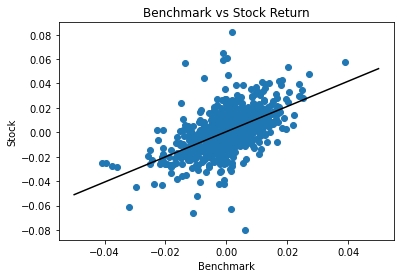

In [102]:
getStockBenchPlot(sp500,aapl)

In [50]:
def getPlot(benchmark, stock):
    data = benchmark.merge(stock, how='inner', left_index=True, right_index=True, suffixes=("_b","_s"))
    data=data.dropna()
    fig, axis = plt.subplots()
    axis.plot(data.index,data[data.columns[0]],'blue',alpha=0.5)
    axis2=axis.twinx()
    axis2.plot(data.index,data[data.columns[1]],'black',alpha=0.5)
    axis2.set_ylabel("Stock")
    axis.set_ylabel("Benchmark", color='blue')
    plt.title("Benchmark vs. Stock")
    

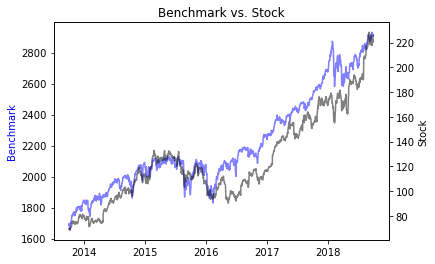

In [51]:
getPlot(sp500,aapl)

In [103]:
def plotHist(data):
    data=index(data).fillna(0)
    plt.hist(data, bins=50)

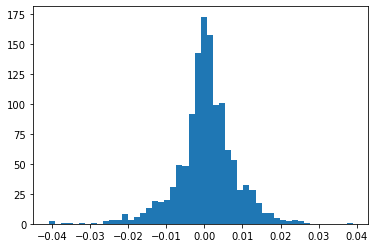

In [105]:
plotHist(sp500)